In [1]:
%matplotlib inline

from glob import glob

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import warnings
from functools import partial

In [2]:
from pyxlma.lmalib.traversal import OneToManyTraversal
from tracerpaws.tracktimeseries import open_track_timeseries_dataset, track_polarimetry, add_track_durations, feature_distance_from

In [3]:
# open_track_timeseries_dataset??

In [4]:
# add_track_durations??

In [5]:
# track_polarimetry??

In [6]:
csapr_lon, csapr_lat = -95.283893, 29.531782
khgx_lat, khgx_lon = 29.4719, -95.0788
khgx_distance_km = 90.0

In [7]:
ref_grid = '/archive/TRACER_NEXRAD/AUGUST/20220807/KHGX20220807_000004_V06_grid.nc'

# Load track timeseries data

In [8]:
# By count of all tracks on the day
lightning_fraction_quartiles_by_all_track_count = [
    ("2022-08-31", "2022-09-15", "2022-09-01"),
    ("2022-08-25", "2022-08-08", "2022-07-13", "2022-08-07", "2022-08-13"),
    ("2022-09-17", "2022-06-04", "2022-08-02", "2022-07-12", "2022-08-27", "2022-08-01", "2022-07-02"),
    ("2022-08-06", "2022-06-22", "2022-06-02", "2022-07-06", "2022-08-21", "2022-08-03", "2022-07-14", "2022-07-28", "2022-07-29", "2022-06-17"),
]


# By count of all zdr_kdp_ltg tracks on the day
lightning_fraction_quartiles_by_zdr_kdp_ltg_count = [
    ("2022-08-31", "2022-09-15", "2022-09-01", "2022-08-25", "2022-08-08", "2022-07-13", "2022-08-07", "2022-08-13"),
    ("2022-09-17", "2022-06-04", "2022-08-02", "2022-07-12", "2022-08-27", "2022-08-01"),
    ("2022-07-02", "2022-08-06", "2022-06-22", "2022-06-02", "2022-07-06", "2022-08-21"),
    ("2022-08-03", "2022-07-14", "2022-07-28", "2022-07-29", "2022-06-17"),
]

quartiles_by_all_track_count = True
if quartiles_by_all_track_count:
    lightning_fraction_quartiles = lightning_fraction_quartiles_by_all_track_count
else:
    lightning_fraction_quartiles = lightning_fraction_quartiles_by_zdr_kdp_ltg_count
    
this_quartile = None
# this_quartile = 3

In [9]:
this_category = "track_has_any"
# this_category = "track_has_zdr_kdp_ltg"
const_melt = True

In [10]:
all_track_timeseries_paths = [
    ['/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_{1}/timeseries_data_melt4400.nc'.format(
        this_category.replace('_','-'), di.replace('-', '')) for di in ds] 
    for ds in lightning_fraction_quartiles]

all_track_paths = [
    ['/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_{1}/Track_features_merges.nc'.format(
        this_category.replace('_','-'), di.replace('-', '')) for di in ds] 
    for ds in lightning_fraction_quartiles]




In [11]:
all_track_paths

[['/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220831/Track_features_merges.nc',
  '/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220915/Track_features_merges.nc',
  '/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220901/Track_features_merges.nc'],
 ['/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220825/Track_features_merges.nc',
  '/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220808/Track_features_merges.nc',
  '/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220713/Track_features_merges.nc',
  '/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220807/Track_features_merges.nc',
  '/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220813/Track_features_merges.nc'],
 ['/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220917/Track_features_merges.nc',
  '/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220604/Track_features_merges.nc',
  '/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220802/Track_features_merges.nc',
  '/archive/TRACER_

In [12]:
all_track_timeseries_paths

[['/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220831/timeseries_data_melt4400.nc',
  '/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220915/timeseries_data_melt4400.nc',
  '/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220901/timeseries_data_melt4400.nc'],
 ['/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220825/timeseries_data_melt4400.nc',
  '/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220808/timeseries_data_melt4400.nc',
  '/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220713/timeseries_data_melt4400.nc',
  '/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220807/timeseries_data_melt4400.nc',
  '/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220813/timeseries_data_melt4400.nc'],
 ['/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220917/timeseries_data_melt4400.nc',
  '/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220604/timeseries_data_melt4400.nc',
  '/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220802/timeseries_data_

In [13]:
first_track = all_track_timeseries_paths[0][0]
ds = xr.open_dataset(first_track)
ds

<xarray.Dataset>
Dimensions:                          (track: 354, cell: 433, feature: 4165)
Coordinates:
  * track                            (track) float64 4.0 7.0 ... 1.416e+03
  * cell                             (cell) int64 5 12 13 ... 14545 14566 14576
  * feature                          (feature) int64 5 140 284 ... 34813 34883
Data variables: (12/20)
    feature_area                     (feature) float64 ...
    feature_maxrefl                  (feature) float64 ...
    feature_zdrvol                   (feature) float64 ...
    feature_kdpvol                   (feature) float64 ...
    feature_rhvdeficitvol            (feature) float64 ...
    feature_zdrcol                   (feature) float32 ...
    ...                               ...
    feature_zdrwt_total              (feature) float64 ...
    feature_kdpwt_total              (feature) float64 ...
    feature_rhvdeficitwt_total       (feature) float64 ...
    feature_flash_count              (feature) float64 ...
    feature_flash_count_area_LE_4km  (feature) float64 ...
    feature_flash_count_area_GT_4km  (feature) float64 ...

In [19]:
def preprocess_day(track_filename, timeseries_filename):
    ds = open_track_timeseries_dataset(track_filename, timeseries_filename, reference_grid=ref_grid)

    ds = feature_distance_from(ds, csapr_lon, csapr_lat, 'csapr')
    ds = feature_distance_from(ds, khgx_lon, khgx_lat, 'khgx')

    # print(ds)
    
    # Set up a prunable tree for the track,cell,feature dataset
    traversal = OneToManyTraversal(ds, ('track','cell','feature'), ('cell_parent_track_id', 'feature_parent_cell_id'))
    
    # Find tracks IDs with at least one feature within the specified range
    feature_in_range = (ds['feature_khgx_dist'] < (khgx_distance_km * 1000.0))
    reduced_track_ids = np.unique(ds[{'feature':feature_in_range}].feature_parent_track_id)
    # print(reduced_track_ids)
    ds_reduced = traversal.reduce_to_entities('track', np.atleast_1d(reduced_track_ids))
    
    ds_reduced = add_track_durations(ds_reduced)
    ds = ds.drop_dims(('x','y','time'))

    return ds_reduced

In [20]:
timeseries_ds = []
for track_ts_quartile, track_quartile in zip(all_track_timeseries_paths, all_track_paths):
    for this_ts_file, this_track_file in zip(track_ts_quartile, track_quartile):
        print(this_ts_file)
        ds = preprocess_day(this_track_file, this_ts_file)
        timeseries_ds.append(ds)
        # break
    # break

/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220831/timeseries_data_melt4400.nc
/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220915/timeseries_data_melt4400.nc
/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220901/timeseries_data_melt4400.nc
/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220825/timeseries_data_melt4400.nc
/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220808/timeseries_data_melt4400.nc
/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220713/timeseries_data_melt4400.nc
/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220807/timeseries_data_melt4400.nc
/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220813/timeseries_data_melt4400.nc
/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220917/timeseries_data_melt4400.nc
/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220604/timeseries_data_melt4400.nc
/archive/TRACER_NEXRAD/TRACER_TRACKING/tobac_Save_20220802/timeseries_data_melt4400.nc
/archive/TRACER_NEXRAD/TRACER_TRACKING/toba

# Plot track durations

In [43]:
duration_bins_minute = np.arange(0.0, 12*60.0,10.0)
counts = np.zeros(duration_bins_minute.shape[0]-1, dtype=int)
for ds in timeseries_ds:
    duration_minute= ds.track_duration.astype('timedelta64[ns]').astype(float)/1e9/60.0
    these_counts, bins = np.histogram(duration_minute.values, bins=duration_bins_minute) 
    counts += these_counts

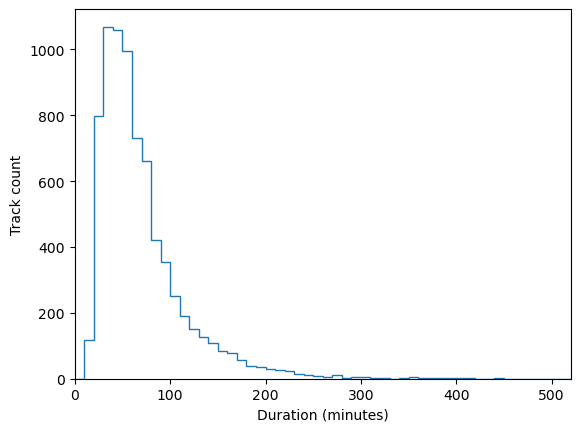

In [53]:
fig, ax = plt.subplots(1,1)
ax.stairs(counts, duration_bins_minute)
ax.set_xlabel('Duration (minutes)')
ax.set_ylabel('Track count')
ax.set_xlim(0,520)
fig.savefig('track_duration_hist.pdf')

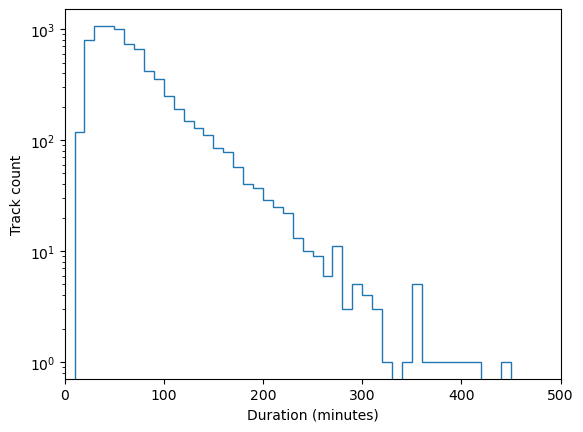

In [52]:
fig, ax = plt.subplots(1,1)
ax.stairs(counts, duration_bins_minute)
ax.set_xlabel('Duration (minutes)')
ax.set_ylabel('Track count')
ax.set_yscale('log')
ax.set_xlim(0,500)
fig.savefig('track_duration_semilog.pdf')

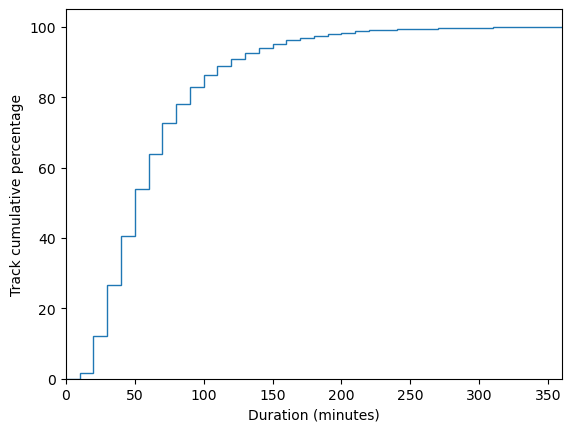

In [51]:
fig, ax = plt.subplots(1,1)
cumulative = 100*np.cumsum(counts)/counts.sum()
ax.stairs(cumulative, duration_bins_minute)
ax.set_xlabel('Duration (minutes)')
ax.set_ylabel('Track cumulative percentage')
# ax.set_yscale('log')

ax.set_xlim(0,360)
fig.savefig('track_duration_cumulative.pdf')

In [50]:
duration_bins_minute_ctr = (duration_bins_minute[1:] + duration_bins_minute[:-1])/2.0
for c,d in zip(cumulative, duration_bins_minute_ctr):
    print(c,d)

0.0 5.0
1.5892094017094016 15.0
12.232905982905983 25.0
26.509081196581196 35.0
40.651709401709404 45.0
53.952991452991455 55.0
63.70192307692308 65.0
72.54273504273505 75.0
78.17841880341881 85.0
82.90598290598291 95.0
86.24465811965813 105.0
88.80876068376068 115.0
90.8119658119658 125.0
92.52136752136752 135.0
93.99038461538461 145.0
95.11217948717949 155.0
96.15384615384616 165.0
96.9150641025641 175.0
97.44925213675214 185.0
97.94337606837607 195.0
98.3306623931624 205.0
98.66452991452991 215.0
98.95833333333333 225.0
99.13194444444444 235.0
99.26549145299145 245.0
99.38568376068376 255.0
99.46581196581197 265.0
99.61271367521367 275.0
99.65277777777777 285.0
99.71955128205128 295.0
99.77297008547009 305.0
99.8130341880342 315.0
99.82638888888889 325.0
99.82638888888889 335.0
99.83974358974359 345.0
99.90651709401709 355.0
99.9198717948718 365.0
99.9332264957265 375.0
99.94658119658119 385.0
99.9599358974359 395.0
99.9732905982906 405.0
99.9866452991453 415.0
99.9866452991453 425.